# Application Questions for Axiom Exergy Inc Richmond, CA 94804

## Question 1
Given a string representing a Roman numeral, write a function to compute the Arabic numerical equivalent. 
For example:
roman_to_arabic("MDCCLXXVI")
should return:
1776.

### Answer
The rules for calculating a roman numeral are:
1)A lower value to the left of a symbol is subtracted.
2)A lower or equal value to the right of a symbol is added.

With this, all we would need to do is create a dictionary with what each symbol corresponds to which number, and check if the number that is to the right of the current index is greater, if it is greater subtract, else add to the result.

In [67]:
def from_roman(num):
    roman_numerals = {'I':1, 'V':5, 'X':10, 'L':50, 'C':100, 'D':500, 'M':1000}
    result = 0
    for i,c in enumerate(num):
        if (i+1) == len(num) or roman_numerals[c] >= roman_numerals[num[i+1]]:
            result += roman_numerals[c]
        else:
            result -= roman_numerals[c]
    return result

ns = str(input("Enter a roman numeral: "))
n = from_roman(ns);
print(n)

Enter a roman numeral: IXV
14


## Question 2
Write a generic function to compute various scenarios for the following optimization problem: 
A farmer owns X acres of land. She profits P1 dollars per acre of corn and P2 dollars per acre of oats. Her team has Y hours of labor available. The corn takes H1 hours of labor per acre and oats require H2 hours of labor per acre. How many acres of each can be planted to maximize profits?
Test the function for the following cases:


##### a) X = 240, Y = 320, P1 = $40, P2 = $30, H1 = 2, H2 = 1
##### b) X = 300, Y = 380, P1 = $70, P2 = $45, H1 = 3, H2 = 1
##### c) X = 180, Y = 420, P1 = $65, P2 = $55, H1 = 3, H2 = 2

### Answer
For this question, I used a greedy algorithm to solve the problem, in which I will try to check which crop will give me the best results if I fill the garden up with as much as I can of each one, and fill in the rest by the other if there is room for it. This will also choose the best crop depending on if there is more time then space, or if there is more space then time. 

In [68]:
def farm_optimize(x, y, p1, p2, h1, h2):
    plant1 = plant2 = profits = 0
    payoff1, payoff2 = p1/h1, p2/h2
    plant1 = int(y/h1)
    while(plant1 > x):
        plant1 -= 1
    plant2 = int(y/h2)
    while(plant2 > x):
        plant2 -= 1
    if((plant1*p1) > (plant2*p2)):
        plant2 = 0
        y -= plant1 * h1
        x -= plant1
        while(y > 0):
            if(y > h2):
                plant2 += 1
                y -= h2
            else:
                break
        while(plant2 > x):
            plant2 -= 1
    else:
        plant1 = 0
        y -= plant2 * h2
        x -= plant2
        while(y > 0):
            if(y > h1):
                plant1 += 1
                y -= h1
            else:
                break
        while(plant1 > x):
            plant1 -= 1
    profits = (plant1 * p1) + (plant2 * p2)
    return plant1,plant2,profits

x = int(input("Enter X: "))
y = int(input("Enter Y: "))
p1 = int(input("Enter p1: "))
p2 = int(input("Enter p2: "))
h1 = int(input("Enter h1: "))
h2 = int(input("Enter h2: "))

result1,result2,profit = farm_optimize(x,y,p1,p2,h1,h2)
print("There will be " + repr(result1) + " of plant 1, " + repr(result2) + " of plant 2, with a total income of: $" + repr(profit))

Enter X: 300
Enter Y: 300
Enter p1: 40
Enter p2: 30
Enter h1: 2
Enter h2: 1
There will be 0 of plant 1, 300 of plant 2, with a total income of: $9000


## Question 3
Given the set of data points, construct a piece-wise linear best-fit approximation (R^2 > 95%) to the curve:
https://www.dropbox.com/s/8fxxgkrhej7xb0a/jsed_curve_fit.csv?dl=0 

### Answer
What I did for the answer of this qeustion was use 3 different python libraries: Pandas to store the data, numpy to calculate the linear piecewise nth-degree polynomial regression, and sklearn to get the R2 score of it to check it. As a visual I also included a plot of the results, in order to visualize what is happening. I choose a value of 4 for the degree, since this is the point where it seems to best fit the data, and doesn't seem to wildly overfit. Having a degree of 2 would suffice though.

0.999574899339


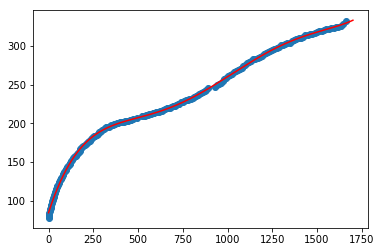

In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

# Read CSV from URL
df = pd.read_csv('https://www.dropbox.com/s/8fxxgkrhej7xb0a/jsed_curve_fit.csv?dl=1')
# Store values into two variables
x = df['x']
y = df['y']
# Get the regression model
regression = np.poly1d(np.polyfit(x, y, 5))

# get and print R2 score
r2 = r2_score(y, regression(x))
print(r2)

# Plot
xp = np.linspace(0, 1700, 1500)
plt.scatter(x, y)
plt.plot(xp, regression(xp), c='r')
plt.show()